In [14]:
import geopandas as gpd
import pandas as pd

In [15]:
df = pd.read_csv('data/csv/newPasig_saved_coordinates.csv')

In [16]:
geometry = gpd.points_from_xy(df['X'], df['Y'], crs="EPSG:4326")
street_points = gpd.GeoDataFrame(geometry=geometry)  
street_points

,geometry
0,POINT (121.06392 14.61466)
1,POINT (121.06519 14.61323)
2,POINT (121.06445 14.60089)
3,POINT (121.06548 14.56409)
4,POINT (121.08611 14.60407)
...,...
475,POINT (121.08500 14.58888)
476,POINT (121.06646 14.56766)
477,POINT (121.08537 14.54345)
478,POINT (121.06575 14.56597)


<AxesSubplot:>

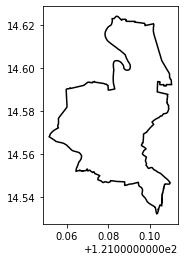

In [17]:
philippines = gpd.read_file('maps/phl_admbnda_adm3_psa_namria_20231106.zip')

pasig = philippines[philippines['ADM3_EN'] == 'City of Pasig']
pasig.boundary.plot(edgecolor='black')

<AxesSubplot:>

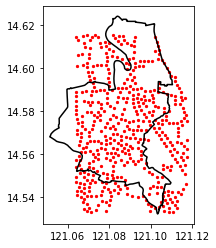

In [23]:
base = pasig.boundary.plot(edgecolor='black')
street_points.plot(ax=base, markersize=5, color='red')

In [19]:
clipped = gpd.clip(street_points, pasig)
len(clipped)

266

<AxesSubplot:>

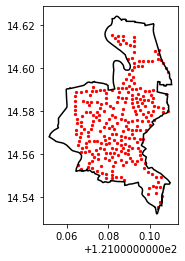

In [24]:
base = pasig.boundary.plot(edgecolor='black')
clipped.plot(ax=base, markersize=5, color='red')

In [21]:
clipped.geometry.y

448    14.548533
414    14.548625
447    14.550355
413    14.550738
389    14.550901
         ...    
23     14.612915
479    14.614782
473    14.615163
450    14.613821
435    14.615457
Length: 266, dtype: float64

In [22]:
df = pd.DataFrame({'X': clipped.geometry.x, 'Y': clipped.geometry.y})
df.to_csv('data/csv/pasig_filtered_coordinates.csv', index=False)